# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [4]:
athletes = pd.read_csv("athletes.csv")

In [5]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [122]:
# Sua análise começa aqui.
athletes.head(10)

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
5,173071782,Aaron Royle,AUS,male,1/26/90,1.80,67.0,triathlon,0,0,0
6,266237702,Aaron Russell,USA,male,6/4/93,2.05,98.0,volleyball,0,0,1
7,382571888,Aaron Younger,AUS,male,9/25/91,1.93,100.0,aquatics,0,0,0
8,87689776,Aauri Lorena Bokesa,ESP,female,12/14/88,1.80,62.0,athletics,0,0,0
9,997877719,Ababel Yeshaneh,ETH,female,7/22/91,1.65,54.0,athletics,0,0,0


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

* A hipótese nula no teste de Shapiro é que a população é normalmente distribuída. 
* Ou seja, caso o p-valor seja menor que alpha, a hipótese nula é rejeitada - há evidência que a distribuição não é normal
* Nível de significância  = alpha (valor de p-valor abaixo do qual H0 é rejeitada)

In [84]:
def q1():
    sample = get_sample(athletes, 'height', n = 3000)
    
    W, p_value = sct.shapiro(sample)
    print('W - ' + str(W))
    print('p_value - ' + str(p_value))
    
    return not(p_value < 0.05) #retorna a não-rejeição de H0 = dist normal ou não
q1()

W - 0.9961519837379456
p_value - 5.681722541339695e-07


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que? Em um primeiro momento não. O teste rejeita a hipótese nula e atesta para uma distribuição não normal. No distplot e no qqplot, a distribuição parece ser normal, ligeiramente assimétrica mas com forma de sino, simétrica.
* Plote o qq-plot para essa variável e a analise. Os valores dos quantis teóricos e da amostra seguem uma correlação linear de 1:1 em sua maioria, mas quantis teóricos menores do que 3 estão fora da linha.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal). Sim, valores muito baixos, como 0.0000005. Nesse caso, o p-valor é maior que alpha e H0 - normalidade - não é rejeitada.

In [54]:
import statsmodels.api as sm

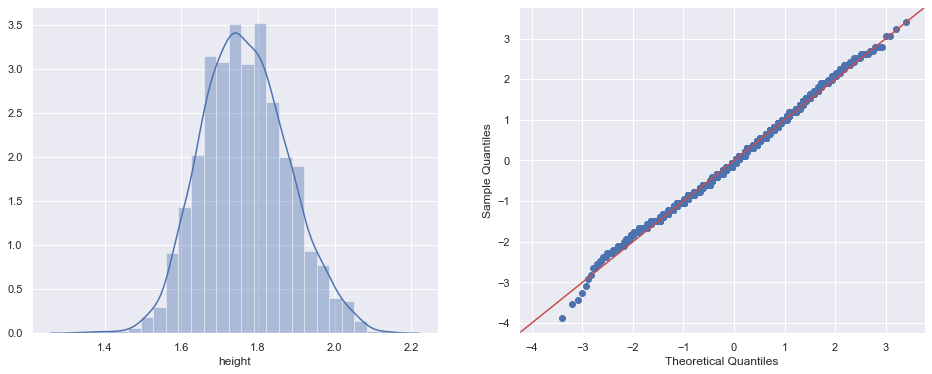

In [93]:
#plotting dist and qq
sample = get_sample(athletes, 'height', n = 3000)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.distplot(sample, bins = 25, ax = ax[0])
sm.qqplot(sample, fit = True, line='45', scale = .5, ax = ax[1])
plt.show()

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

* H0 é de que curtose e skewness valem 0
* p_valor é menor que 0.05 - rejeitamos H0 - kurt e skew diferentes de 0? 

In [114]:
def q2():
    sample = get_sample(athletes, 'height', n = 3000)
    jb, p_value = sct.jarque_bera(sample)
    
    print('skew - ' + str(sample.skew()))
    print('kurt - ' + str(sample.kurtosis()))   
    print('jb - ' + str(jb))
    print('p_value - ' + str(p_value))
    
    return not(p_value < 0.05)
q2()

skew - 0.15982888594665348
kurt - -0.04487456446662286
jb - 13.03363513594265
p_value - 0.001478366424594868


False

__Para refletir__:

* Esse resultado faz sentido? Sim. A curtose é relativamante próxima a 0, mas skew() é 0.15, levemente positiva e atesta para uma assimetria leve.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [118]:
def q3():
    sample = get_sample(athletes, 'weight', n = 3000)
    dap, p_value = sct.normaltest(sample)
    
    print('skew - ' + str(sample.skew()))
    print('dap - ' + str(dap))
    print('p_value - ' + str(p_value))
    
    return not(p_value < 0.05)
q3()

skew - 1.032439407946382
dap - 510.24655809881176
p_value - 1.5898922918029537e-111


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que? Sim. O teste rejeita H0 de normalidade. No distplot fica clara uma assimetria dos dados. No qqplot, a relação entre quantis também não é linear.  
* Um _box plot_ também poderia ajudar a entender a resposta. O box plot mostra que existem uma conjunto de outliers de pessoas com pessos muito superiores, provavelmente em esportes de força, como arremeso e levantamento de peso, etc.

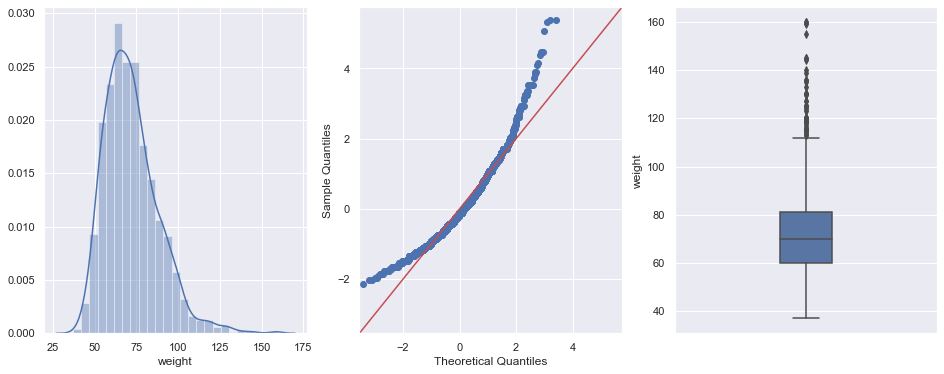

In [170]:
#plotting dist, qq and boxplot
sample = get_sample(athletes, 'weight', n = 3000)
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
sns.distplot(sample, bins = 25, ax = ax[0])
sm.qqplot(sample, fit = True, line='45', scale = .5, ax = ax[1])
sns.boxplot(sample, orient = 'v', width = 0.20, ax = ax[2])
plt.show()

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [119]:
def q4():
    sample = np.log(get_sample(athletes, 'weight', n = 3000))
    dap, p_value = sct.normaltest(sample)
    
    print('skew - ' + str(sample.skew()))
    print('dap - ' + str(dap))
    print('p_value - ' + str(p_value))
    
    return not(p_value < 0.05) 
q4()

skew - 0.3055683725063363
dap - 45.91534331977353
p_value - 1.0705572101256944e-10


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que? Sim, ainda é possível notar certa assimetria apesar da transformação ter suavizado consideravelmente. Skew foi de 1 para 0.3 aplicando a escala log.
* Você esperava um resultado diferente agora? Apesar da escala log ser outra, a distribuição assimétrica dos dados se mantém.

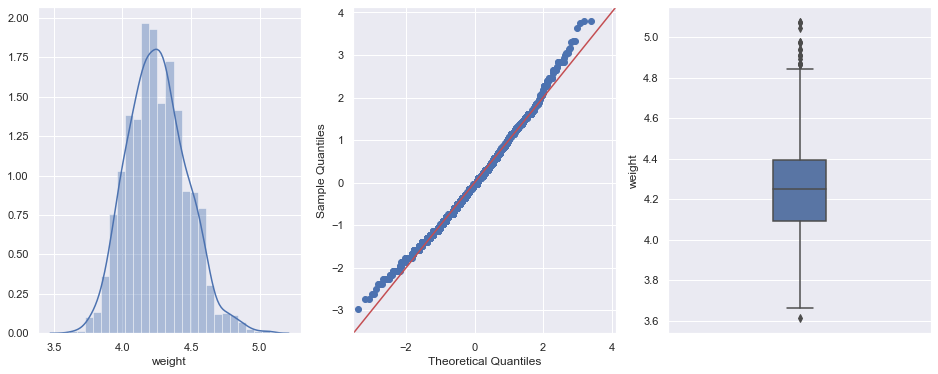

In [171]:
#plotting dist, qq and boxplot
sample = np.log(get_sample(athletes, 'weight', n = 3000))
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
sns.distplot(sample, bins = 25, ax = ax[0])
sm.qqplot(sample, fit = True, line='45', scale = .5, ax = ax[1])
sns.boxplot(sample, orient = 'v', width = 0.20,  ax = ax[2])
plt.show()

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

**ttest - a hipótese nula H0 é a de que duas amostras independentes possuem valores médios esperados semelhantes**
* médias iguais = não rejeitar H0 = p_value > 0.05
* u = u0

In [172]:
bra, can, usa = [athletes[athletes['nationality'] == nation] for nation in ['BRA', 'CAN', 'USA']]

In [173]:
def q5():
    stat, p_value = sct.ttest_ind(bra['height'], usa['height'], equal_var = False, nan_policy = 'omit') 
    print(p_value)
    return not(p_value < 0.05) #médias iguais -> não rejeitar H0
q5()

0.0013080041830140115


False

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [153]:
def q6():
    stat, p_value = sct.ttest_ind(bra['height'], can['height'], equal_var = False, nan_policy = 'omit') 
    print(p_value)
    return not(p_value < 0.05)
q6()

0.5230827295440921


True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [158]:
def q7():
    stat, p_value = sct.ttest_ind(usa['height'], can['height'], equal_var = False, nan_policy = 'omit') 
    return float(p_value.round(8))
q7()

0.0004660129347389851


0.00046601

__Para refletir__:

* O resultado faz sentido? Sim. Se as médias são estatisticamente semelhantes entre BR e CAN, mas diferentes entre BR e USA, com certeza serão também diferentes entre CAN e USA.
* Você consegue interpretar esse p-valor? Valor bem abaixo do nível de significância. Rejeitamos H0 -> médias estatisticamente diferentes.
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?